## IMPORTING LIBRARIES

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.image as mpimg
%matplotlib inline

## LOADING MODEL

In [3]:
model = tf.keras.models.load_model('trained_cnn_model.keras')

In [4]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## VISUALIZING SINGLE IMAGE

In [8]:
image_path = "test\\test\\AppleScab1.JPG"

In [9]:
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #Convert BGR img to RGB

([], [])

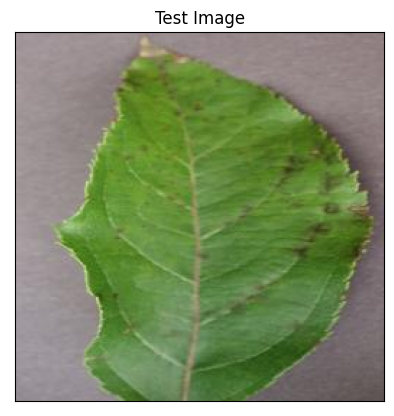

In [10]:
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])

## TESTING MODEL

In [11]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))

In [12]:
input_arr = tf.keras.preprocessing.image.img_to_array(image)

In [13]:
print(input_arr.shape)     #we wont be using this because this is a single image

(128, 128, 3)


In [14]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])     #we will use this because this will show single image in a batch
print(input_arr.shape)            #here the 1 represents the batch size, and we need a batch because we have trained aur model on batches

(1, 128, 128, 3)


In [15]:
predictions = model.predict(input_arr)

1/1 [==============================] - 13s 13s/step


In [16]:
predictions

array([[9.99682307e-01, 1.06847597e-06, 3.02232280e-07, 2.54138035e-06,
        4.45177086e-08, 4.33192525e-07, 1.10033993e-09, 1.08808614e-07,
        2.04456239e-08, 1.06148477e-07, 1.05243991e-09, 1.97095620e-08,
        3.60654617e-10, 6.72077741e-11, 8.70047998e-08, 1.31757901e-07,
        3.02260130e-04, 1.77999251e-08, 1.98474073e-08, 1.21098198e-08,
        1.47117831e-07, 3.61330467e-06, 6.30685236e-07, 1.14198140e-09,
        3.02644154e-09, 5.09107565e-07, 1.24969731e-07, 4.94507937e-08,
        4.76953232e-07, 1.08077437e-07, 5.58967486e-08, 1.33889856e-07,
        4.23750316e-06, 1.12521192e-09, 3.74305301e-07, 1.29089384e-09,
        4.04487821e-09, 5.56978392e-08]], dtype=float32)

In [17]:
predictions.shape

(1, 38)

In [18]:
result_index = np.argmax(predictions)

In [19]:
result_index

0

In [21]:

class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

## DISPLAYING RESULT

In [22]:
model_prediction = class_name[result_index]

In [23]:
model_prediction

'Apple___Apple_scab'

([], [])

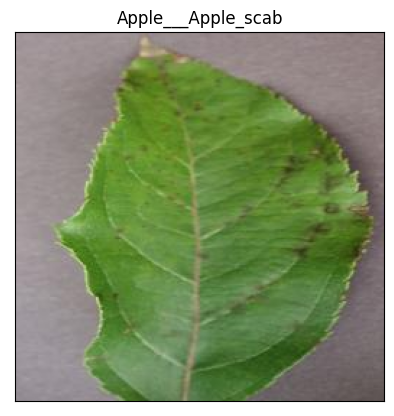

In [24]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(model_prediction)
plt.yticks([])
plt.xticks([])

## ANOTHER IMAGE TESTNG

(1, 128, 128, 3)
1/1 [==============================] - 0s 79ms/step
The Image shown below is of  Tomato___healthy


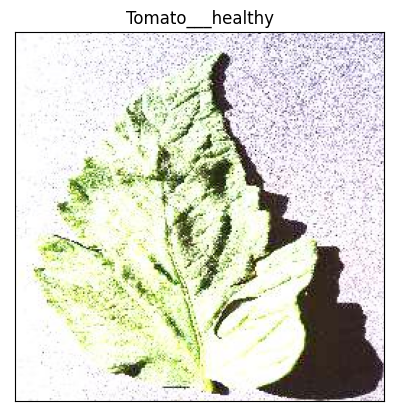

In [25]:
image_path = "test\\test\\TomatoHealthy4.JPG"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])    
print(input_arr.shape)
predictions = model.predict(input_arr)
result_index = np.argmax(predictions)
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(model_prediction)
plt.yticks([])
plt.xticks([])
print("The Image shown below is of ",model_prediction)